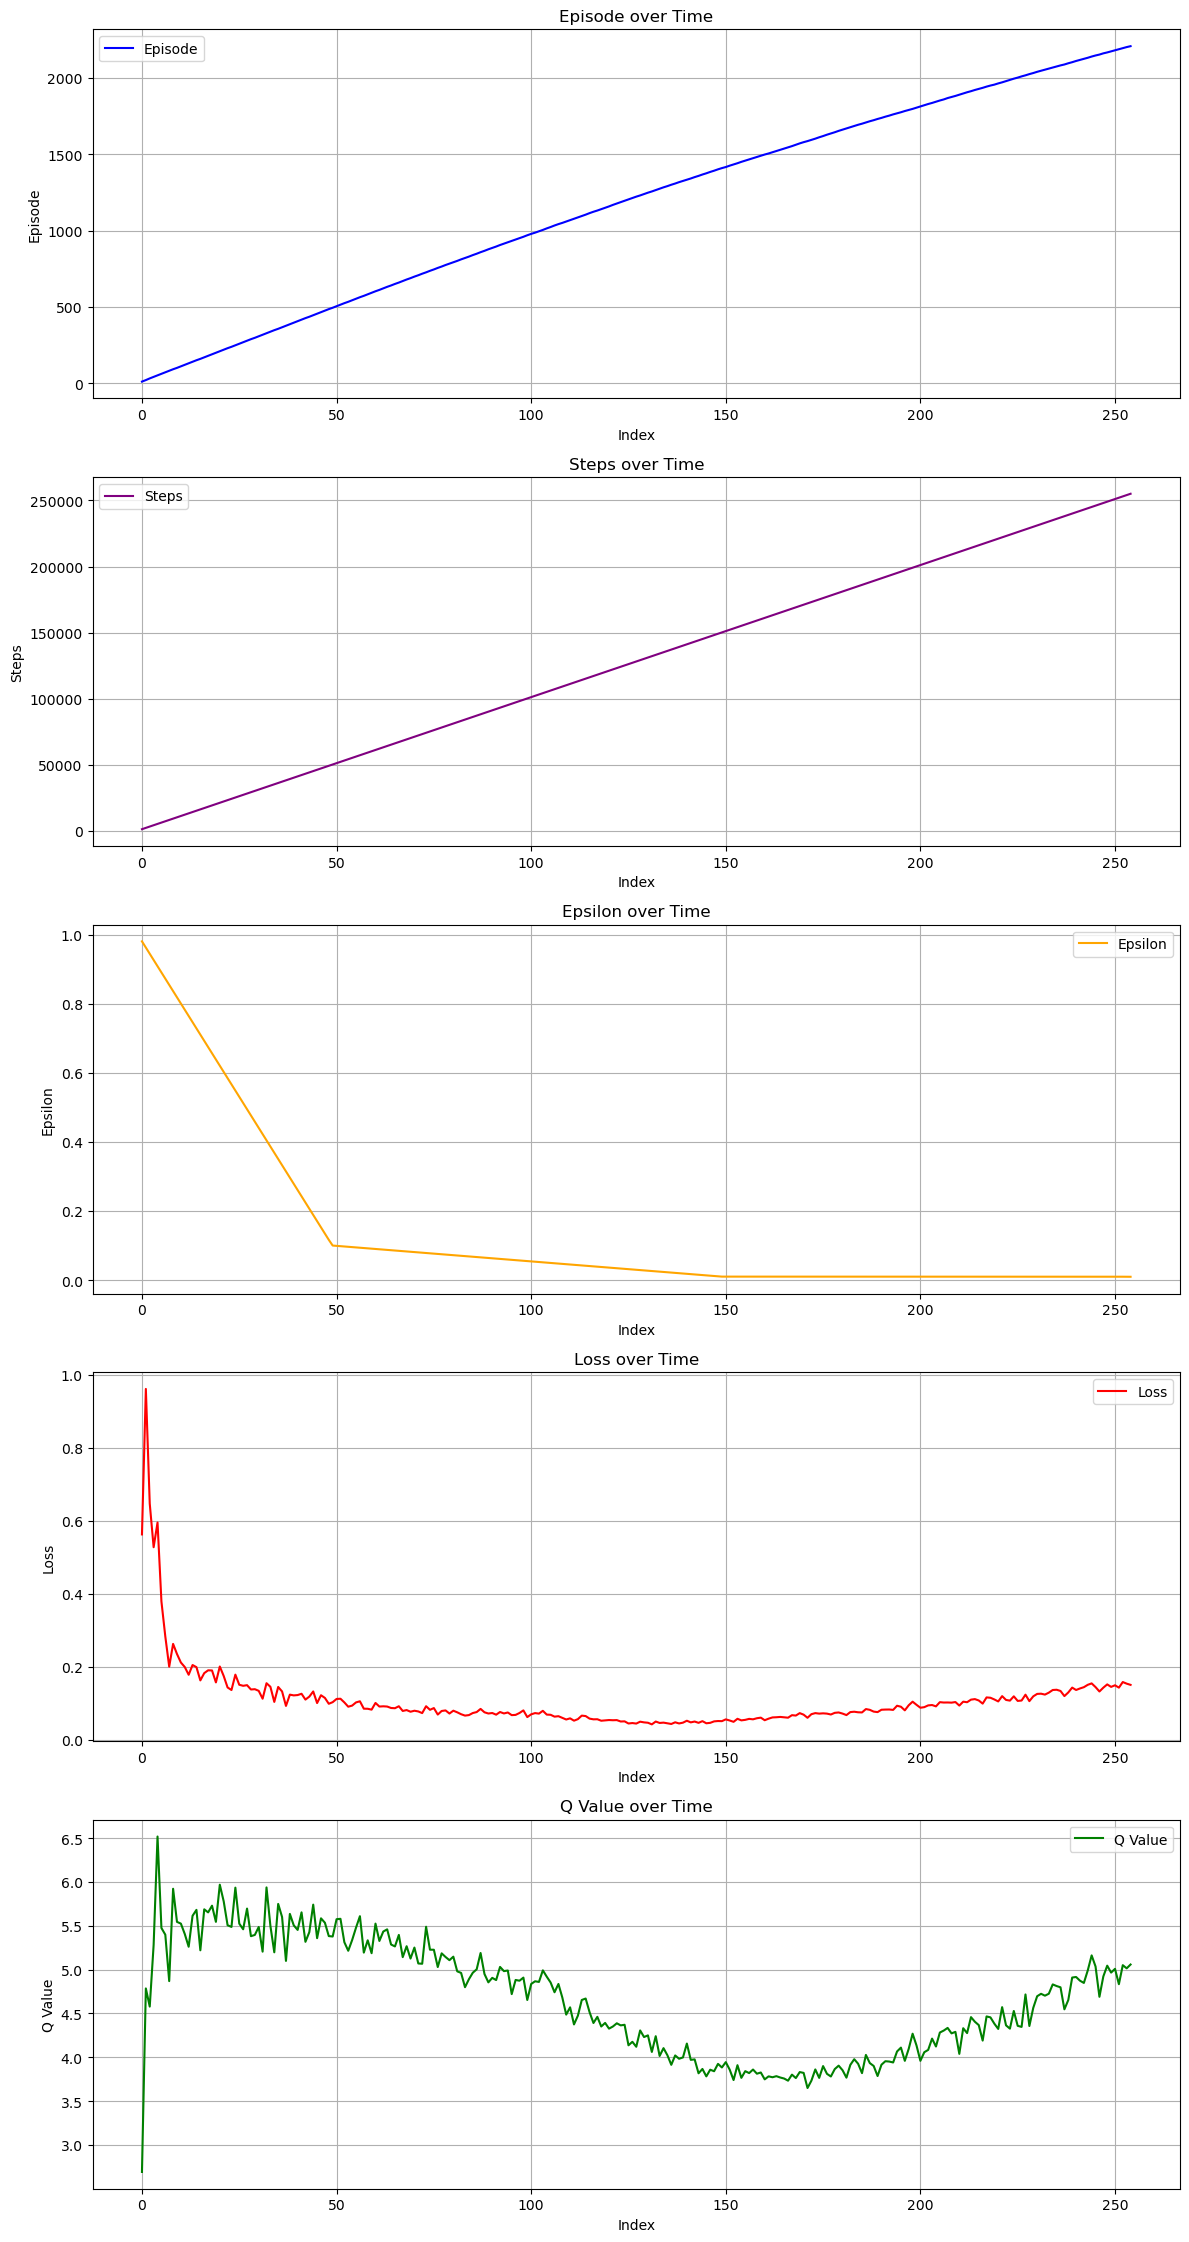

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_csv_data(file_name, num_last_episodes=None):
    # 提示用户输入文件名
    #file_name = input("请输入要读取的CSV文件名（包括扩展名）：")
    
    try:
        # 读取CSV文件
        data = pd.read_csv(file_name)
        
        # 检查文件中是否包含需要的列
        required_columns = ["Time", "episode", "Steps", "epsilon", "loss", "Q_value"]
        if not all(col in data.columns for col in required_columns):
            print(f"文件中缺少以下必需列：{set(required_columns) - set(data.columns)}")
            return
        
        # 如果 num_last_episodes 被设置为 None，就显示全部数据
        if num_last_episodes is not None:
            data = data.tail(num_last_episodes)
        
        # 绘制图像
        plt.figure(figsize=(12, 40))
        
        # 绘制 episode 图像
        plt.subplot(9, 1, 1)
        plt.plot(data["episode"], label="Episode", color='blue')
        plt.xlabel("Index")
        plt.ylabel("Episode")
        plt.title("Episode over Time")
        plt.grid()
        plt.legend()

        # 绘制 Steps 图像
        plt.subplot(9, 1, 2)
        plt.plot(data["Steps"], label="Steps", color='purple')
        plt.xlabel("Index")
        plt.ylabel("Steps")
        plt.title("Steps over Time")
        plt.grid()
        plt.legend()
        
        # 绘制 epsilon 图像
        plt.subplot(9, 1, 3)
        plt.plot(data["epsilon"], label="Epsilon", color='orange')
        plt.xlabel("Index")
        plt.ylabel("Epsilon")
        plt.title("Epsilon over Time")
        plt.grid()
        plt.legend()
        
        # 绘制 loss 图像
        plt.subplot(9, 1, 4)
        plt.plot(data["loss"], label="Loss", color='red')
        plt.xlabel("Index")
        plt.ylabel("Loss")
        plt.title("Loss over Time")
        plt.grid()
        plt.legend()
        
        # 绘制 Q_value 图像
        plt.subplot(9, 1, 5)
        plt.plot(data["Q_value"], label="Q Value", color='green')
        plt.xlabel("Index")
        plt.ylabel("Q Value")
        plt.title("Q Value over Time")
        plt.grid()
        plt.legend()
        
        # 调整布局并显示图像
        plt.tight_layout()
        plt.show()
        
    except FileNotFoundError:
        print("文件未找到，请检查文件名后重试。")
    except pd.errors.EmptyDataError:
        print("文件为空，请检查文件内容。")
    except Exception as e:
        print(f"发生错误：{e}")

csv_file = f'dueling_dqn_noise_MultiStep_PER_2024-12-14_21-48-13.csv'
# 调用函数，只显示最后 20 个数据
plot_csv_data(csv_file)
